# Convolutional Neural Network

### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# To avoid: 
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized. 
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
tf.__version__

'2.9.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
# !mkdir dataset
# !gdown https://drive.google.com/uc?id=1YA1xeNgtYcvLuOHw6ZOJckOKOmPAhPCZ -O dataset/CatsDogs.zip
# !unzip -qq dataset/CatsDogs.zip -d datasets

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
                                   
training_set = train_datagen.flow_from_directory('dataset/CatsDogs/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 4992 images belonging to 2 classes.


### Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('dataset/CatsDogs/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [8]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
156/156 [==============================] - 27s 166ms/step - loss: 0.5127 - accuracy: 0.7977 - val_loss: 0.8942 - val_accuracy: 0.5000
Epoch 2/25
156/156 [==============================] - 24s 156ms/step - loss: 0.4746 - accuracy: 0.8015 - val_loss: 0.9048 - val_accuracy: 0.5045
Epoch 3/25
156/156 [==============================] - 25s 158ms/step - loss: 0.4503 - accuracy: 0.8125 - val_loss: 0.5997 - val_accuracy: 0.6990
Epoch 4/25
156/156 [==============================] - 25s 159ms/step - loss: 0.4354 - accuracy: 0.8195 - val_loss: 0.7331 - val_accuracy: 0.5585
Epoch 5/25
156/156 [==============================] - 24s 154ms/step - loss: 0.4223 - accuracy: 0.8165 - val_loss: 0.6428 - val_accuracy: 0.6520
Epoch 6/25
156/156 [==============================] - 24s 156ms/step - loss: 0.4056 - accuracy: 0.8309 - val_loss: 0.5720 - val_accuracy: 0.7210
Epoch 7/25
156/156 [==============================] - 24s 155ms/step - loss: 0.3944 - accuracy: 0.8379 - val_loss: 0.6268 - val_ac

## Part 4 - Making a single prediction

In [18]:
import numpy as np
from keras.utils import load_img, img_to_array

test_image = load_img('dataset/CatsDogs/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 [==============================] - 0s 128ms/step


dog


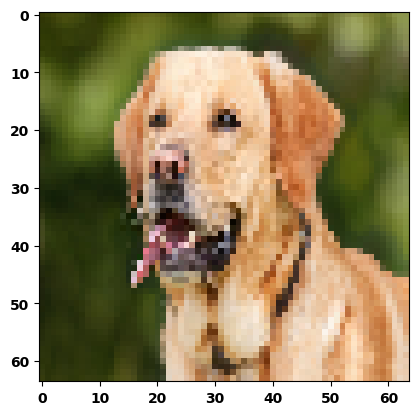

In [37]:
import matplotlib.pyplot as plt

print(prediction)
plt.imshow(test_image.squeeze().astype('int32'));